# Plot cluster map of samples ConsensusTME gene set NES

Script related to figure s5

Aim:
- Plot clustermap of ConsensusTME NES as additional visualisation

## Import packages

In [1]:
import warnings
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
home='~/Documents/PhD/Software/Scripts/OVCT/1.REBUTTAL/0.Figures/5' # home

## Get sample labels

### Load file

In [3]:
file_keys = home+'/1.Data/NACT_SampleLabels.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [4]:
sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds
Well,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in
A02,A02_3368B_Liver,3368,Treated,other,out
A03,A03_0371A_R_diaphragm,371,Untreated,other,out
A04,A04_0371B_R_diaphragm,371,Treated,other,out
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in


### Define sample colours

In [5]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("husl", len(case_mrna)).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

## Load ssGSEA results

In [6]:
file_nes = home+'/1.Data/ConsensusTME_NACT_NES.txt'

data_nes = pd.read_csv(file_nes,
                       sep='\t')

data_nes.set_index('Term',
                   inplace=True)

In [7]:
data_nes.tail()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Term,,,,,,,,,,,,,,,,,,,,,
Plasma_cells,0.326882,0.483244,0.484968,0.512587,0.253428,0.332096,0.334770,0.556291,0.370180,0.438191,...,0.488638,0.439075,0.380160,0.378705,0.400398,0.337096,0.393253,0.638702,0.425042,0.596435
T_cells_CD4,-0.151260,-0.172278,0.154900,0.069036,-0.212100,-0.143919,-0.146261,-0.001396,-0.258183,-0.120923,...,-0.199379,-0.213471,-0.171529,-0.244783,-0.033248,-0.194803,-0.077282,0.163015,-0.007922,-0.093441
T_cells_CD8,-0.124588,-0.099327,0.098996,0.082092,-0.169720,-0.144463,-0.167269,-0.004968,-0.159959,-0.155491,...,-0.087820,-0.106419,-0.118318,-0.247615,0.025758,-0.182130,-0.034114,0.168739,0.004279,-0.072557
T_cells_gamma_delta,-0.121056,-0.110020,0.020995,0.065898,-0.180424,-0.120656,-0.143999,-0.051105,-0.231617,-0.171884,...,-0.089236,-0.112779,-0.147467,-0.258662,-0.023540,-0.152077,-0.047563,0.172180,-0.019459,-0.113018
T_regulatory_cells,-0.171317,-0.176621,0.124944,0.077918,-0.287924,-0.195206,-0.345462,0.040120,-0.353342,-0.133729,...,-0.229964,-0.182788,-0.230199,-0.264175,-0.043436,-0.208631,-0.065168,0.105513,-0.091520,-0.187371


### Define gene set colors

In [8]:
GREEN = '#007F00'
RED = '#CC0000'
GREY = '#D3D3D3'
BLUE = '#0000E5'
YELLOW = '#FFFF00'

color_sets = {
'Endothelial':                                  RED,
'B_cells':                                      '#A6CDE1',
'T_cells_CD8':                                  '#FFDD15',
'Cytotoxic_cells':                              '#FFD400',
'Dendritic_cells':                              '#A181BA',
'Eosinophils':                                  '#D8AF62',
'Macrophages':                                  '#F58A21',
'Macrophages_M1':                               '#F58A21',
'Macrophages_M2':                               '#F58A21',
'Monocytes':                                    '#F58A21',
'Mast_cells':                                   '#F7F29B',
'NK_cells':                                     '#70B09D',
'Neutrophils':                                  '#B05A28',
'T_cells_gamma_delta':                          '#4F9F45',
'T_cells_CD4':                                  '#EC1C24',
'T_regulatory_cells':                           '#67B853',
'Plasma_cells':                                 '#A6CDE1',
'Fibroblasts':                                  BLUE,
'TumourCellularity_mRNA':                       'k'
}

In [9]:
color_sets_df = pd.DataFrame.from_dict(color_sets, orient='index')

In [10]:
color_sets_df.head()

,0
Endothelial,#CC0000
B_cells,#A6CDE1
T_cells_CD8,#FFDD15
Cytotoxic_cells,#FFD400
Dendritic_cells,#A181BA


### Map tumour cellularity info to cmap

In [11]:
mRNA_tumcell_file = home+'/1.Data/NACT_log2exp_loess_norm_filtered_ESTIMATE.txt'

mRNA_tumcell = pd.read_csv(mRNA_tumcell_file,
                           skiprows=2,
                           sep='\t',
                           index_col='NAME')

del(mRNA_tumcell['Description'])

mRNA_tumcell.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
NAME,,,,,,,,,,,,,,,,,,,,,
StromalScore,150.243978,100.962227,967.051900,808.453034,-65.569315,489.893858,490.720381,1061.377025,235.450362,418.150347,...,263.744096,464.939728,802.734452,153.081049,1103.804616,579.702569,788.616732,1237.456125,887.344608,501.153545
ImmuneScore,176.145317,526.978700,1297.193578,1203.727348,131.468582,650.323221,407.055460,1082.029608,88.028614,282.209677,...,481.526245,516.592649,582.005013,29.396052,908.321033,258.334588,849.462145,1496.053219,969.848566,621.394231
ESTIMATEScore,326.389295,627.940928,2264.245478,2012.180381,65.899267,1140.217080,897.775841,2143.406633,323.478976,700.360025,...,745.270341,981.532377,1384.739465,182.477100,2012.125649,838.037157,1638.078877,2733.509343,1857.193174,1122.547776
TumorPurity,0.794327,0.766668,0.591924,0.621334,0.816969,0.716267,0.740642,0.606127,0.794586,0.759799,...,0.755497,0.732326,0.690764,0.806982,0.621341,0.746506,0.663403,0.535046,0.638998,0.718075


In [12]:
sample_labels['TumourCellularity_mRNA'] = mRNA_tumcell.loc['TumorPurity']

### Separate matched and unmatched samples

In [13]:
matched = [3368,371,9717,8674,2359,564,7765,6965,9347]

matched_df = sample_labels[sample_labels['Case_mRNA'].isin(matched)]

unmatched_df = sample_labels[~sample_labels['Case_mRNA'].isin(matched)]

In [14]:
matched_df.head()

,Name,Case_mRNA,NACT,Site,Bounds,Colour,TumourCellularity_mRNA
Well,,,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in,#62ae31,0.794327
A02,A02_3368B_Liver,3368,Treated,other,out,#62ae31,0.766668
A03,A03_0371A_R_diaphragm,371,Untreated,other,out,#f45deb,0.591924
A04,A04_0371B_R_diaphragm,371,Treated,other,out,#f45deb,0.621334
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in,#f564d1,0.816969


In [15]:
matched_nes_df = data_nes[matched_df.index]

unmatched_nes_df = data_nes[unmatched_df.index]

### Tumour cellularity

In [16]:
cmp = plt.cm.binary
norm = matplotlib.colors.Normalize(vmin=matched_df['TumourCellularity_mRNA'].min(),
                                   vmax=matched_df['TumourCellularity_mRNA'].max(),
                                   clip=False)

mapper = cm.ScalarMappable(norm=norm,
                           cmap=cm.binary)

with warnings.catch_warnings():
    
    warnings.simplefilter("ignore")
    matched_tumcell_vals = mapper.to_rgba(matched_df['TumourCellularity_mRNA'])
    print ('NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For')

    na_ind = [i for i, x in enumerate(matched_df['TumourCellularity_mRNA'].isna()) if x]

matched_tumcell_vals[na_ind] = [0,0,0,0]


NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For


In [17]:
cmp = plt.cm.binary
norm = matplotlib.colors.Normalize(vmin=unmatched_df['TumourCellularity_mRNA'].min(),
                                   vmax=unmatched_df['TumourCellularity_mRNA'].max(),
                                   clip=False)

mapper = cm.ScalarMappable(norm=norm,
                           cmap=cm.binary)

with warnings.catch_warnings():
    
    warnings.simplefilter("ignore")
    unmatched_tumcell_vals = mapper.to_rgba(unmatched_df['TumourCellularity_mRNA'])
    print ('NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For')

    na_ind = [i for i, x in enumerate(unmatched_df['TumourCellularity_mRNA'].isna()) if x]

unmatched_tumcell_vals[na_ind] = [0,0,0,0]


NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For


In [18]:
matched_df["NACT_colour"] = matched_df["NACT"].replace(
    ["Untreated","Treated"],["b","r"])

matched_df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,Case_mRNA,NACT,Site,Bounds,Colour,TumourCellularity_mRNA,NACT_colour
Well,,,,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in,#62ae31,0.794327,b
A02,A02_3368B_Liver,3368,Treated,other,out,#62ae31,0.766668,r
A03,A03_0371A_R_diaphragm,371,Untreated,other,out,#f45deb,0.591924,b
A04,A04_0371B_R_diaphragm,371,Treated,other,out,#f45deb,0.621334,r
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in,#f564d1,0.816969,b


## Plot matched

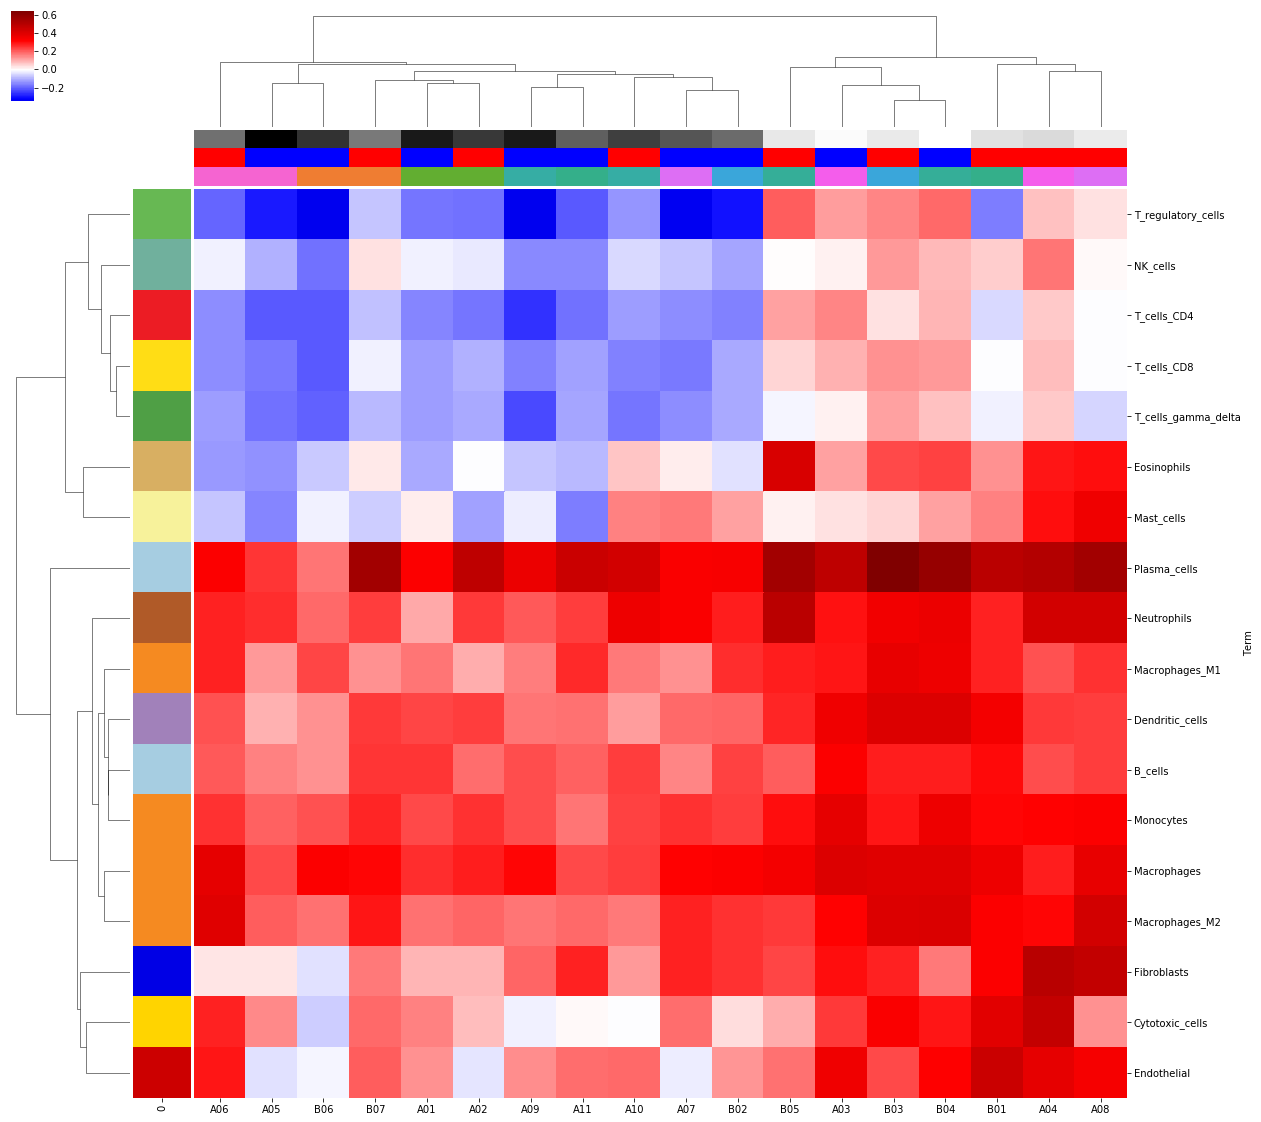

In [21]:
g1 = sns.clustermap(matched_nes_df,
                    cmap='seismic',
                    center=0,
                    figsize = (20,20),
                    col_colors=[matched_tumcell_vals,
                                matched_df['NACT_colour'],
                                matched_df['Colour']],
                    row_colors=color_sets_df[0],
                    linewidths=0.0, rasterized=True
                   )

### Save plot

In [22]:
g1.savefig('../2.Plots/s5_d_NACT_matched_consensusTME_NES_clustermap.pdf',
           bbox='tight')

## Plot unmatched

In [23]:
unmatched_df["NACT_colour"] = unmatched_df["NACT"].replace(
    ["Untreated","Treated"],["b","r"])

unmatched_df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,Case_mRNA,NACT,Site,Bounds,Colour,TumourCellularity_mRNA,NACT_colour
Well,,,,,,,,
B08,B08_9883A_Abdominal_Wall,9883,Untreated,other,out,#97a431,0.771557,b
B09,B09_9883B_R_ovary,9883,Treated,ovary,out,#97a431,0.770038,r
B10,B10_6229A_Posterior_cul_de_sac,6229,Untreated,other,in,#46a1f4,0.624749,b
B11,B11_6229B_R_ovary,6229,Treated,ovary,out,#46a1f4,0.713719,r
B12,B12_1573A_Pelvic_soft_tissue_box,1573,Untreated,other,in,#82a931,0.865876,b


In [27]:
unmatched_nes_df.shape

(18, 38)

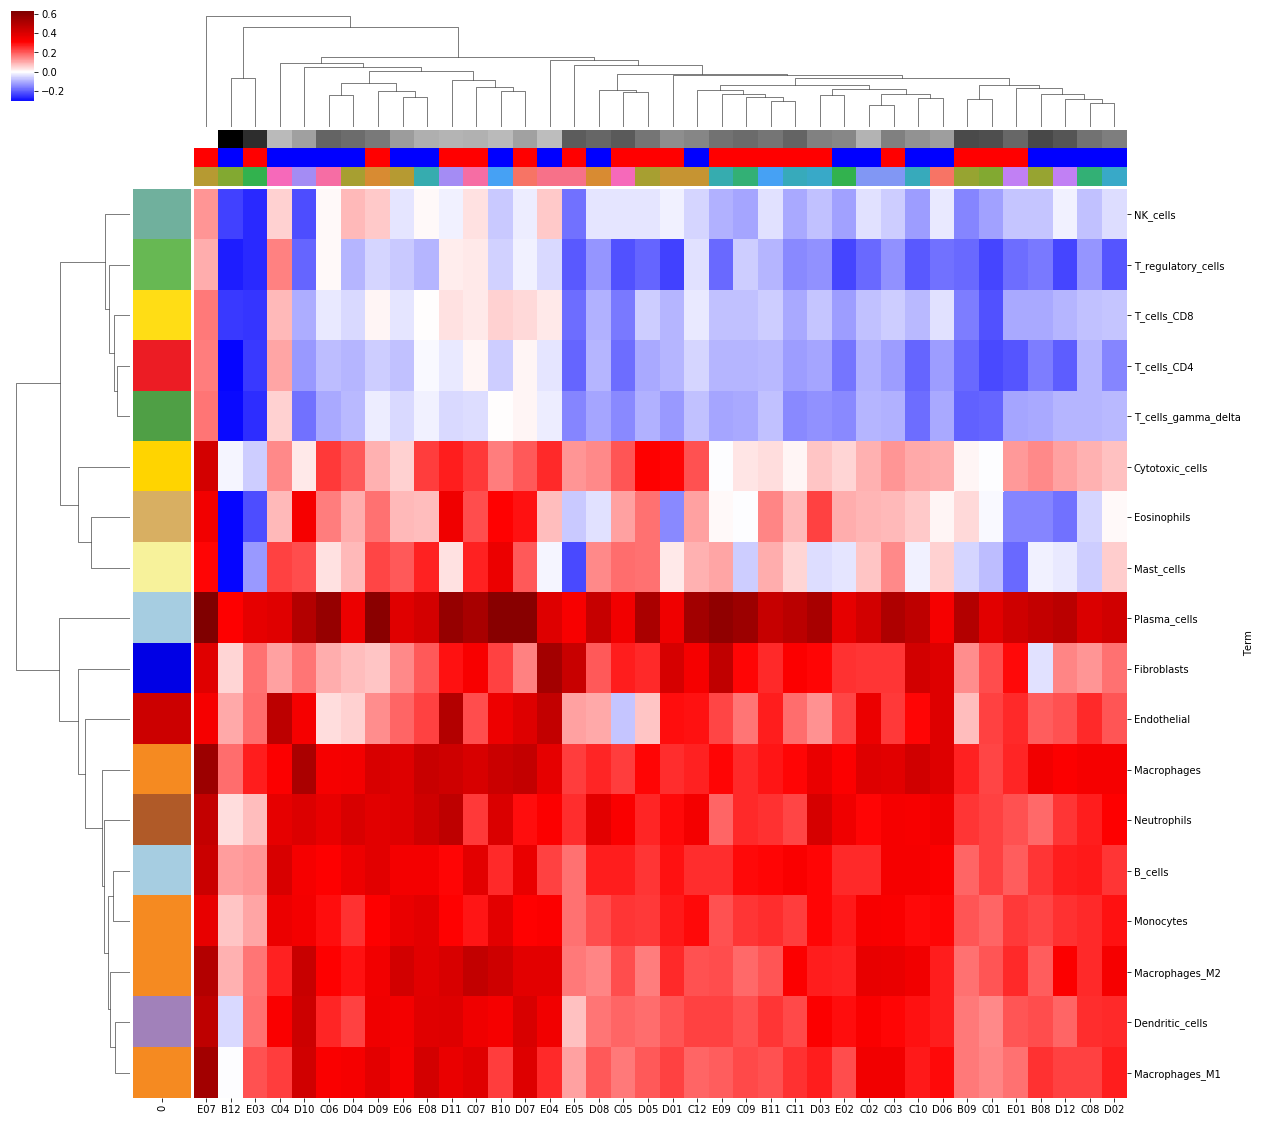

In [25]:
g2 = sns.clustermap(unmatched_nes_df,
                    cmap='seismic',
                    center=0,
                    figsize = (20,20),
                    col_colors=[unmatched_tumcell_vals,
                                unmatched_df['NACT_colour'],
                                unmatched_df['Colour']],
                    row_colors=color_sets_df[0],
                   linewidths=0.0, rasterized=True)

### Save plot

In [26]:
g2.savefig('../2.Plots/s5_d_NACT_unmatched_consensusTME_NES_clustermap.pdf',
           bbox='tight')

# End script